# Python Blockchain

In [38]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (10, 6)

from itertools import product, permutations, combinations, combinations_with_replacement, zip_longest

import hashlib
import hmac

from pprint import pprint

Field

Finite Field



Elliptic Curve Cryptography

ECDSA Elliptic Curve Digital Signature Algorithm

Fast Exponentiation

ECDLP Elliptic Curve Discrete Logarithm Problem

Discrete Logarithm

Schnorr Signature



Bitcoin

BIP Bitcoin Improvement Proposal

BIP32

BIP39

BIP44

---

__$n$th Root of Unity in a Field $F$__<br>
A number $z$ satisfying the equation $z^n = 1$ where $n$ is a positive integer.<br>
The roots of unity in $F$ are either complex numbers if the characteristic of $F$ is zero or elements of a finite field if the characteristic of $F$ is prime.<br>
Conversely, every nonzero element in a finite field is a root of unity in that field.<br>

__Characteristic__ of a Ring $R$<br>
The smallest number of times one must use the ring's multiplicative identity in a sum to get the additive identity.<br>
If this sum never reaches the additive identity, the ring has characteristic zero.<br>
$$\text{char}(R) \,\text{is the smallest positive number n such that}\, \underbrace{1 + ... + 1}_{n \,\text{summands}} = 0$$

__Claim__<br>
Let $F$ be a field.<br>
The characteristic of $F$ is either zero or a prime number.<br>

__Claim__<br>
Let $F$ be a field.<br>
$F$ has a unique minimal subfield (prime field).<br>

__Finite Field $GF(q = p^h)$__<br>
A finite field $GF(q = p^h)$ is an extension of degree $h$ of the prime field $GF(p)$ of the same characteristic.<br>
The finite field is generated by an element that is a root of an irreducible polynomial of degree $h$.<br>

__Prime Field $GF(p)$__<br>

__Claim__<br>
Let $GF(q)$ be a finite field where $q = p^h$ where $p$ is a prime number and $h$ is a positive integer.<br>
$GF(q)$ has characteristic $p$.<br>

__Claim about Primitive Element__<br>
Let $GF(q)$ be a finite field.<br>
There is some $g \in GF(q)$ called a _primitive element_ such that all $f \ne 0 \in GF(q)$ are $g^{q - 1} = 1, g, g^2, ..., g^{q - 2}$.<br>
A primitive element is a generator of the field's multiplicative group.<br>
By Fermat's Little Theorem, the elements of the field's multiplicative group are the roots of the equation $x^{q - 1} - 1 = 0$ (the $(q - 1)$-th roots of unity).

Characteristic [Wiki](https://en.wikipedia.org/wiki/Characteristic_(algebra)#prime_field)<br>
Lagrange's Theorem [Wiki](https://en.wikipedia.org/wiki/Lagrange%27s_theorem_(group_theory))<br>
Minimal Polynomial [Wiki](https://en.wikipedia.org/wiki/Minimal_polynomial_(field_theory))<br>
Monic Polynomial [Wiki](https://en.wikipedia.org/wiki/Monic_polynomial)<br>
Order [Wiki](https://en.wikipedia.org/wiki/Order_(group_theory))<br>
Root of Unity [Wiki](https://en.wikipedia.org/wiki/Root_of_unity)<br>

https://crypto.stanford.edu/pbc/notes/numbertheory/gen.html

https://www.python-course.eu/polynomial_class_in_python.php

__Fermat's Little Theorem__ [Wiki](https://en.wikipedia.org/wiki/Fermat%27s_little_theorem)<br>
$n^{p - 1} \,\text{mod}\, p = 1$ for any prime $p$ and $n \gt 0$

__Division__<br>
$
\begin{align}
\frac{a}{b} &= ab^{-1} \,\text{where}\, b \ne 0 \\
b^{p - 1} &= 1 \,\text{for prime p by Fermat's Little Theorem} \\
b^{-1} &= b^{-1} \cdot 1 \\
&= b^{-1} \cdot b^{p - 1} \\
&= b^{p - 2} \\
\end{align}
$

---

In [39]:
class FieldElement:
    """ The FieldElement class represents an element of a prime Galois field. """
    
    def __init__ (self, num, prime):
        """ Initialize a new FieldElement.
        
        Parameters
        ==========
        self  [FieldElement]
        num   [int]:         the finite field element
        prime [int]:         the finite field order
        """
        
        # a prime field element must be between 0 and prime - 1 inclusive
        if num >= prime or num < 0:
            error = f'Num {num} not in field range 0 to {prime - 1}'
            raise ValueError(error)
            
        self.num = num
        self.prime = prime
        
    def __repr__ (self):
        """ Return a string representation of a FieldElement.
        
        Parameters
        ==========
        self [FieldElement]
        """
        return f'FieldElement_{self.prime}({self.num})'
    
    def __eq__ (self, other):
        """ Define FieldElement equality as equality of both the FieldElements' num and prime properties.
        
        Parameters
        ==========
        self  [FieldElement]
        other [FieldElement]
        
        Return
        ======
        [bool]: True if FieldElement equality holds else False
        """
        if other is None:
            return False
        
        return self.num == other.num and self.prime == other.prime
    
    def __ne__ (self, other):
        """ Define FieldElement inequality as inequality of either the FieldElements' num or prime properties.
        
        Parameters
        ==========
        self  [FieldElement]
        other [FieldElement]
        
        Return
        ======
        [bool]: True if FieldElement inequality holds else False
        """
        if other is None:
            return False
        
        return self.num != other.num or self.prime != other.prime
        
    def __add__ (self, other):
        """ Define finite field addition in terms of modular arithmetic addition.
        
            If a and b are finite field elements and add() is finite field addition
            then add(a, b) = (a + b) % p.
        
        Parameters
        ==========
        self  [FieldElement]
        other [FieldElement]
        
        Return
        ======
        [FieldElement]: a FieldElement from the same field
        """
        if self.prime != other.prime:
            raise TypeError('Cannot add two numbers from different fields.')
            
        num = (self.num + other.num) % self.prime
        return self.__class__(num, self.prime)
        
    def __sub__ (self, other):
        """ Define finite field substraction in terms of modular arithmetic subtraction.
        
            If a and b are finite field elements and sub() is finite field subtraction
            then sub(a, b) = (a + (-b) % p where (-b) is the additive inverse of b.
        
        Parameters
        ==========
        self  [FieldElement]
        other [FieldElement]
        
        Return
        ======
        [FieldElement]: a FieldElement from the same field
        """
        if self.prime != other.prime:
            raise TypeError('Cannot subtract two numbers from different fields.')
        
        num = (self.num - other.num) % self.prime
        return self.__class__(num, self.prime)
        
    def __mul__ (self, other):
        """ Define FieldElement multiplication.
        
        Parameters
        ==========
        self  [FieldElement]
        other [FieldElement]
        
        Return
        ======
        [FieldElement]: a FieldElement from the same field
        """
        if self.prime != other.prime:
            raise TypeError('Cannot multiply two numbers from different fields.')
        
        num = (self.num * other.num) % self.prime
        return self.__class__(num, self.prime)
        
    def __pow__ (self, exponent):
        """ Define FieldElement exponentiation.
        
        Parameters
        ==========
        self  [FieldElement]
        exponent
        
        Return
        ======
        [FieldElement]: a FieldElement from the same field
        """
        if exponent < 0:
            exponent = exponent % (self.prime - 1)
        num = pow(self.num, exponent, self.prime) # more efficient than num = (self.num ** exponent) % self.prime
        return self.__class__(num, self.prime)
    
    def __truediv__ (self, other):
        """ Define finite field division in terms of Fermat's Little Theorem.
        
        Fermat's Little Theorem says that n^{p - 1} mod p = 1 for any prime p and n > 0.
        
        self.num ** (p - 1) % p == 1
        
        Therefore
        1/b == pow(b, p-2, p)
        a/b == pow(b, p-2, p) * a % p
        
        Parameters
        ==========
        self  [FieldElement]
        other [FieldElement]
        
        Return
        ======
        [FieldElement]: a FieldElement from the same field
        """
        if self.prime != other.prime:
            raise TypeError('Cannot divide two numbers from different fields.')
        
        num = self.num * pow(other.num, self.prime - 2, self.prime) % self.prime
        return self.__class__(num, self.prime)
    
    def __rmul__ (self, coefficient):
        num = (self.num * coefficient) % self.prime
        return self.__class__(num, self.prime)
        
    def __lt__ (self, other):
        if self.prime != other.prime:
            raise TypeError('Cannot order two numbers from different fields.')
        return self.num < other.num

    
    
def generate_finite_field (order=2):
    return [FieldElement(element, order) for element in range(order)]

def find_generators (order=2):
    finite_field = generate_finite_field(order)
    return [(element.num, set([(element**i).num for i in range(1, order)])) for element in finite_field[1:]]

In [11]:
generate_finite_field(5)

[FieldElement_5(0),
 FieldElement_5(1),
 FieldElement_5(2),
 FieldElement_5(3),
 FieldElement_5(4)]

In [12]:
def fermat_little_theorem (order=2):
    """ Apply the group operation p - 1 times to each nonzero element of a finite field of order p.
        Fermat's Little Theorem says that n^{p - 1} mod p = 1 for any prime p and n > 0.
    """
    finite_field = generate_finite_field(order)
    return [(element ** (order - 1)).num for element in finite_field[1:]]

# finite fields of orders 2 through 23
[fermat_little_theorem(order) for order in range(2, 24)]

[[1],
 [1, 1],
 [1, 0, 3],
 [1, 1, 1, 1],
 [1, 2, 3, 4, 5],
 [1, 1, 1, 1, 1, 1],
 [1, 0, 3, 0, 5, 0, 7],
 [1, 4, 0, 7, 7, 0, 4, 1],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 8, 3, 4, 5, 0, 7, 8, 9, 4, 11],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [1, 4, 9, 1, 10, 6, 4, 4, 6, 10, 1, 9, 4, 1],
 [1, 0, 11, 0, 13, 0, 7, 0, 9, 0, 3, 0, 5, 0, 15],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 14, 9, 16, 11, 0, 13, 8, 9, 10, 5, 0, 7, 2, 9, 4, 17],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 8, 7, 4, 5, 16, 3, 12, 9, 0, 11, 8, 17, 4, 15, 16, 13, 12, 19],
 [1, 4, 9, 16, 4, 15, 7, 1, 18, 16, 16, 18, 1, 7, 15, 4, 16, 9, 4, 1],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [13]:
order = 5
f = generate_finite_field(order)
find_generators(order)

[(1, {1}), (2, {1, 2, 3, 4}), (3, {1, 2, 3, 4}), (4, {1, 4})]

In [14]:
order = 19
f = generate_finite_field(order)
for k in f[1:]:
    print(([(k * elem).num for elem in f]))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 1, 3, 5, 7, 9, 11, 13, 15, 17]
[0, 3, 6, 9, 12, 15, 18, 2, 5, 8, 11, 14, 17, 1, 4, 7, 10, 13, 16]
[0, 4, 8, 12, 16, 1, 5, 9, 13, 17, 2, 6, 10, 14, 18, 3, 7, 11, 15]
[0, 5, 10, 15, 1, 6, 11, 16, 2, 7, 12, 17, 3, 8, 13, 18, 4, 9, 14]
[0, 6, 12, 18, 5, 11, 17, 4, 10, 16, 3, 9, 15, 2, 8, 14, 1, 7, 13]
[0, 7, 14, 2, 9, 16, 4, 11, 18, 6, 13, 1, 8, 15, 3, 10, 17, 5, 12]
[0, 8, 16, 5, 13, 2, 10, 18, 7, 15, 4, 12, 1, 9, 17, 6, 14, 3, 11]
[0, 9, 18, 8, 17, 7, 16, 6, 15, 5, 14, 4, 13, 3, 12, 2, 11, 1, 10]
[0, 10, 1, 11, 2, 12, 3, 13, 4, 14, 5, 15, 6, 16, 7, 17, 8, 18, 9]
[0, 11, 3, 14, 6, 17, 9, 1, 12, 4, 15, 7, 18, 10, 2, 13, 5, 16, 8]
[0, 12, 5, 17, 10, 3, 15, 8, 1, 13, 6, 18, 11, 4, 16, 9, 2, 14, 7]
[0, 13, 7, 1, 14, 8, 2, 15, 9, 3, 16, 10, 4, 17, 11, 5, 18, 12, 6]
[0, 14, 9, 4, 18, 13, 8, 3, 17, 12, 7, 2, 16, 11, 6, 1, 15, 10, 5]
[0, 15, 11, 7, 3, 18, 14, 10, 6, 2, 17, 13, 9, 5, 1, 16, 12, 8

---

# Elliptic Curves

__General Form of an Weierstrass [Wiki](https://en.wikipedia.org/wiki/Weierstrass%27s_elliptic_functions) Elliptic Curve__ [Wiki](https://en.wikipedia.org/wiki/Elliptic_curve)<br>
$$
\begin{align}
y^2 &= x^3 + ax + b \\
0 &= x^3 + (-1)y^2 + ax + b \\
\end{align}
$$

### Elliptic Curve Arithmetic

__Point Addition__<br>

__Properties of Point Addition__<br>
Associativity<br>
(A + B) + C = A + (B + C)<br>
the reason for reflecting over the x-axis<br>

Commutativity<br>
A + B = B + A<br>
the line going through A and B will intersect the curve a third time in the same place, no matter the order<br>

Existence of Identity Point<br>
I + A = A<br>
There is some point I, called the _point at infinity_, such that when added to point A the resulting point is A.<br>

Existence of Inverse Points<br>
A + (-A) = I<br>
For all points A there is some point -A such that their point addition yields the point at infinity.<br>
Visually, a point and its inverse are reflected over the x-axis.<br>

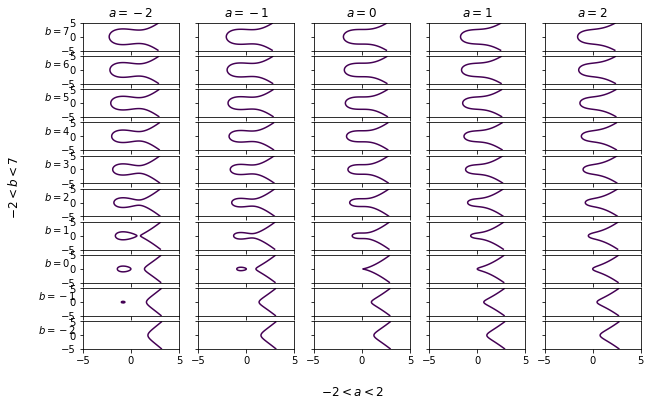

In [15]:
a_min, a_max = -2, 2
b_min, b_max = -2, 7
a_ran = range(a_min, a_max + 1)
b_ran = range(b_max, b_min - 1, -1)
a_len = len(a_ran)
b_len = len(b_ran)

x, y = np.meshgrid(a_ran, b_ran)
parameters = [(x, y) for x, y in zip(x.ravel(), y.ravel())]

fig, axs = plt.subplots(b_len, a_len, sharex=True, sharey=True)
for param in parameters:
    a = param[0]
    b = param[1]
    y, x = np.ogrid[-5:5:100j, -5:5:100j]
    axs[b_max - param[1], param[0] + a_max].contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])
    
for i, ax in enumerate(axs[0]):
    ax.set_title(f'$a = {i - a_max}$')
for i, ax in enumerate(axs[:, 0]):
    ax.set_ylabel(f'$b = {b_max - i}$', rotation=0)
    
fig.supxlabel(f'${a_min} < a < {a_max}$')
fig.supylabel(f'${b_min} < b < {b_max}$');#, rotation=0);

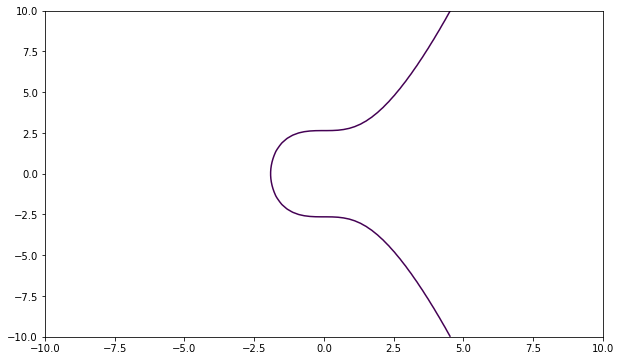

In [16]:
a = 0
b = 7
y, x = np.ogrid[-10:10:100j, -10:10:100j]
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0]);

__SEC P256 Koblitz 1 secp256k1 Bitcoin Elliptic Curve__<br>
$$
\begin{align}
a &= 0 \\
b &= 7 \\
y^2 &= x^3 + (0)x + (7) \\
&= x^3 + 7 \\
\end{align}
$$

The finite field of order p = $2^{256} - 2^{32} - 977$ where $p$ was chosen to be relatively close to $2^{256}$, though not the largest prime smaller than $2^{256}$.

The base point $g$ is a pair of numbers $x, y \,\text{mod}\, p$

__Compressed Base Point__<br>
$g = 02 79BE 667E F9DC BBAC 55A0 6295 CE87 0B07 029B FCDB 2DCE 28D9 59F2 815B 16F8 1798$<br>
prefix $02$<br>
$x = 79BE 667E F9DC BBAC 55A0 6295 CE87 0B07 029B FCDB 2DCE 28D9 59F2 815B 16F8 1798$<br>
The compressed base point yields the x coordinate. The y coordinate can be derived from the x coordinate.<br>
There are two values of $y$ that satisfy $y^2 = x^3 + 7$<br>
If the compressed base point begins with 02, select the root whose least significant bit is even.<br>
If the compressed base point begins with 03, select the root whose least significant bit is odd.<br>
The two roots sum to $p$, and $p$ is odd, so one of the roots is even and the other root is odd.<br>
The remainder of the string is the hexadecimal representation of the x coordinate.<br>

__Uncompressed Base Point__<br>
$g = 040x 79BE 667E F9DC BBAC 55A0 6295 CE87 0B07 029B FCDB 2DCE 28D9 59F2 815B 16F8 1798 483A DA77 26A3 C465 5DA4 FBFC 0E11 08A8 FD17 B448 A685 5419 9C47 D08F FB10 D4B8$<br>
prefix $04 0x$<br>
$x = 79BE 667E F9DC BBAC 55A0 6295 CE87 0B07 029B FCDB 2DCE 28D9 59F2 815B 16F8 1798$<br>
$y = 483A DA77 26A3 C465 5DA4 FBFC 0E11 08A8 FD17 B448 A685 5419 9C47 D08F FB10 D4B8$<br>
The uncompressed base point begins with $04$ followed by the hexadecimal representation of $x$ and $y$ concatenated together.<br>

In [17]:
p = 2**256 - 2**32 - 977
x = '79BE 667E F9DC BBAC 55A0 6295 CE87 0B07 029B FCDB 2DCE 28D9 59F2 815B 16F8 1798'.replace(' ', '').lower()
y = '483A DA77 26A3 C465 5DA4 FBFC 0E11 08A8 FD17 B448 A685 5419 9C47 D08F FB10 D4B8'.replace(' ', '').lower()
g_uncomp = x + y
display(
    2**256,
    hex(2**256),
    int('FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEBAAEDCE6AF48A03BBFD25E8CD0364141', 16),
    
    p,
    hex(p),
    
    x,
    y,
    g_uncomp,
    
    (int(y, 16)**2 % p - int(x, 16)**3 % p - 7) % p == 0,
)

115792089237316195423570985008687907853269984665640564039457584007913129639936

'0x10000000000000000000000000000000000000000000000000000000000000000'

115792089237316195423570985008687907852837564279074904382605163141518161494337

115792089237316195423570985008687907853269984665640564039457584007908834671663

'0xfffffffffffffffffffffffffffffffffffffffffffffffffffffffefffffc2f'

'79be667ef9dcbbac55a06295ce870b07029bfcdb2dce28d959f2815b16f81798'

'483ada7726a3c4655da4fbfc0e1108a8fd17b448a68554199c47d08ffb10d4b8'

'79be667ef9dcbbac55a06295ce870b07029bfcdb2dce28d959f2815b16f81798483ada7726a3c4655da4fbfc0e1108a8fd17b448a68554199c47d08ffb10d4b8'

True

In [18]:
def bits_per_int (positive_integer):
    return int(np.floor(np.log2(positive_integer)) + 1)
def fast_exponentiation (num, exp):
    bin_exp = format(exp, f'0{bits_per_int(exp)}b')
    #print(bin_exp)
    mul = num
    for bit in bin_exp[1:]:
        if bit == '0':
            mul = mul**2
        else:
            mul = mul**2 * num
    return mul

In [40]:
class Point:
    
    def __init__ (self, x, y, a, b):
        self.a = a
        self.b = b
        self.x = x
        self.y = y
        
        if self.x is None and self.y is None:
            return
        
        if self.y**2 != self.x**3 + a * x + b:
            raise ValueError(f'({x}, {y}) is not on the curve')
            
    def __eq__ (self, other):
        return self.x == other.x and self.y == other.y and self.a == other.a and self.b == other.b
    
    def __ne__ (self, other):
        return not (self == other)
        #return self.x != other.x or self.y != other.y or self.a != other.a or self.b != other.b
    
    def __repr__ (self):
        if self.x is None:
            return 'Point(infinity)'
        else:
            return f'Point({self.x}, {self.y})_{self.a}_{self.b}'
        
    def __add__ (self, other):
        if self.a != other.a or self.b != other.b:
            raise TypeError(f'Points {self}, {other} are not on the same curve')
            
        if self.x is None:  # if self is the point at infinity...
            return other    # ...then self + other = other
        if other.x is None: # if other is the point at infinity...
            return self     # ...then self + other = self
        
        # Result is point at infinity
        if self.x == other.x and self.y != other.y:
            return self.__class__(None, None, self.a, self.b)
        
        # Case 2: self.x != other.x
        # Formula (x3,y3)==(x1,y1)+(x2,y2)
        # s=(y2-y1)/(x2-x1)
        # x3=s**2-x1-x2
        # y3=s*(x1-x3)-y1
        
        if self.x != other.x:
            slope = (other.y - self.y) / (other.x - self.x)
            x = slope**2 - self.x - other.x
            y = slope * (self.x - x) - self.y
            return self.__class__(x, y, self.a, self.b)
        
        if self == other and self.y == 0 * self.x:
            return self.__class__(None, None, self.a, self.b)

        # Case 3: self == other
        # Formula (x3,y3)=(x1,y1)+(x1,y1)
        # s=(3*x1**2+a)/(2*y1)
        # x3=s**2-2*x1
        # y3=s*(x1-x3)-y1
        
        if self == other:
            slope = (3 * self.x**2 + self.a) / (2 * self.y)
            x = slope**2 - 2 * self.x
            y = slope * (self.x - x) - self.y
            return self.__class__(x, y, self.a, self.b)
        
    def __rmul__ (self, coefficient):
        coef = coefficient
        current = self
        result = self.__class__(None, None, self.a, self.b)
        while coef:
            if coef & 1:
                result += current
            current += current
            coef >>= 1
        return result
        
def on_curve (x, y):
    return y**2 == x**3 + 5*x + 7
        
def plot_elliptic_curve (points, a=0, b=7):
    y, x = np.ogrid[-10:10:100j, -10:10:100j]
    plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])
    for point in points:
        if point:
            plt.scatter(point.x, point.y);

In [20]:
p1 + p1

Polynomial (8, 0, -8, 6, 0)

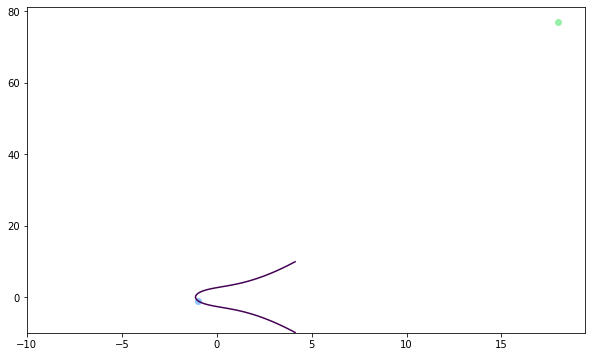

In [21]:
p1 = Point(-1, -1, 5, 7)
p2 = Point(-1, 1, 5, 7)
p3 = Point(2, 5, 5, 7)
p4 = p1 + p3
p5 = p1 + p1
inf = Point(None, None, 5, 7)
points = [p1, p5, inf]
plot_elliptic_curve(points, 5, 7)

---

# ECC Elliptic Curve Cryptography

In [60]:
order = 223
ff = generate_finite_field(order)

a = ff[0]
b = ff[7]

x1 = ff[192]
y1 = ff[105]
p1 = Point(x1, y1, a, b)

x2 = ff[17]
y2 = ff[56]
p2 = Point(x2, y2, a, b)

p3 = Point(None, None, a, b)

display(
    p1,
    p2,
    p1 + p2,
    p2 + p1,
    p1 + p1,
    p2 + p2,
    p3,
    p1 + p3,
    p3 + p3,
)

Point(FieldElement_223(192), FieldElement_223(105))_FieldElement_223(0)_FieldElement_223(7)

Point(FieldElement_223(17), FieldElement_223(56))_FieldElement_223(0)_FieldElement_223(7)

Point(FieldElement_223(170), FieldElement_223(142))_FieldElement_223(0)_FieldElement_223(7)

Point(FieldElement_223(170), FieldElement_223(142))_FieldElement_223(0)_FieldElement_223(7)

Point(FieldElement_223(49), FieldElement_223(71))_FieldElement_223(0)_FieldElement_223(7)

Point(FieldElement_223(13), FieldElement_223(190))_FieldElement_223(0)_FieldElement_223(7)

Point(infinity)

Point(FieldElement_223(192), FieldElement_223(105))_FieldElement_223(0)_FieldElement_223(7)

Point(infinity)

In [46]:
def hash256 (s):
    """ two rounds of sha256 """
    return hashlib.sha256(hashlib.sha256(s).digest()).digest()

A = 0
B = 7
P = 2**256 - 2**32 - 977
N = 0xfffffffffffffffffffffffffffffffebaaedce6af48a03bbfd25e8cd0364141

class S256Field (FieldElement):
    def __init__ (self, num, prime=None):
        super().__init__(num=num, prime=P)
    def __repr__ (self):
        return '{:x}'.format(self.num).zfill(64)
    
class S256Point (Point):
    def __init__ (self, x, y, a=None, b=None):
        a, b = S256Field(A), S256Field(B)
        if type(x) == int:
            super().__init__(x=S256Field(x), y=S256Field(y), a=a, b=b)
        else:
            super().__init__(x=x, y=y, a=a, b=b)
    def __repr__ (self):
        if self.x is None:
            return 'S256Point(infinity)'
        else:
            return f'S256Point({self.x}, {self.y})'
    def __rmul__ (self, coefficient):
        coef = coefficient % N
        return super().__rmul__(coef)
    def verify (self, z, sig):
        s_inv = pow(sig.s, N - 2, N)
        u = z * s_inv % N
        v = sig.r * s_inv % N
        total = u * G + v * self
        return total.x.num == sig.r
    
G = S256Point(
    0x79be667ef9dcbbac55a06295ce870b07029bfcdb2dce28d959f2815b16f81798,
    0x483ada7726a3c4655da4fbfc0e1108a8fd17b448a68554199c47d08ffb10d4b8
)

class Signature:
    def __init__ (self, r, s):
        self.r = r
        self.s = s
    def __repr__ (self):
        return 'Signature({:x},{:x})'.format(self.r, self.s)
    
class PrivateKey:
    def __init__ (self, secret):
        self.secret = secret
        self.point = secret * G
    def hex (self):
        return '{:x}'.format(self.secret).zfill(64)
    def sign (self, z):
        k = self.deterministic_k(z)
        r = (k * G).x.num
        k_inv = pow(k, N - 2, N)
        s = (z + r * self.secret) * k_inv % N
        if s > N / 2:
            s = N - s
        return Signature(r, s)
    def deterministic_k (self, z):
        k = b'\x00' * 32
        v = b'\x01' * 32
        if z > N:
            z -= N
        z_bytes = z.to_bytes(32, 'big')
        secret_bytes = self.secret.to_bytes(32, 'big')
        s256 = hashlib.sha256
        k = hmac.new(k, v + b'\x00' + secret_bytes + z_bytes, s256).digest()
        v = hmac.new(k, v, s256).digest()
        while True:
            v = hmac.new(k, v, s256).digest()
            candidate = int.from_bytes(v, 'big')
            if candidate >= 1 and candidate < N:
                return candidate
            k = hmac.new(k, v + b'\x00', s256).digest()
            v = hmac.new(k, v, s256).digest()

---

In [47]:
from unittest import TestCase, TestSuite, TextTestRunner

class FieldElementTest (TestCase):

    def test_ne(self):
        a = FieldElement(2, 31)
        b = FieldElement(2, 31)
        c = FieldElement(15, 31)
        self.assertEqual(a, b)
        self.assertTrue(a != c)
        self.assertFalse(a != b)

    def test_add(self):
        a = FieldElement(2, 31)
        b = FieldElement(15, 31)
        self.assertEqual(a + b, FieldElement(17, 31))
        a = FieldElement(17, 31)
        b = FieldElement(21, 31)
        self.assertEqual(a + b, FieldElement(7, 31))

    def test_sub(self):
        a = FieldElement(29, 31)
        b = FieldElement(4, 31)
        self.assertEqual(a - b, FieldElement(25, 31))
        a = FieldElement(15, 31)
        b = FieldElement(30, 31)
        self.assertEqual(a - b, FieldElement(16, 31))

    def test_mul(self):
        a = FieldElement(24, 31)
        b = FieldElement(19, 31)
        self.assertEqual(a * b, FieldElement(22, 31))

    def test_pow(self):
        a = FieldElement(17, 31)
        self.assertEqual(a**3, FieldElement(15, 31))
        a = FieldElement(5, 31)
        b = FieldElement(18, 31)
        self.assertEqual(a**5 * b, FieldElement(16, 31))

    def test_div(self):
        a = FieldElement(3, 31)
        b = FieldElement(24, 31)
        self.assertEqual(a / b, FieldElement(4, 31))
        a = FieldElement(17, 31)
        self.assertEqual(a**-3, FieldElement(29, 31))
        a = FieldElement(4, 31)
        b = FieldElement(11, 31)
        self.assertEqual(a**-4 * b, FieldElement(13, 31))
        
class PointTest (TestCase):
    
    def test_ne(self):
        a = Point(x=3, y=-7, a=5, b=7)
        b = Point(x=18, y=77, a=5, b=7)
        self.assertTrue(a != b)
        self.assertFalse(a != a)
        
    def test_on_curve (self):
        with self.assertRaises(ValueError):
            Point(x=-2, y=4, a=5, b=7)
        # these should not raise an error
        Point(x=3, y=-7, a=5, b=7)
        Point(x=18, y=77, a=5, b=7)

    def test_add0(self):
        a = Point(x=None, y=None, a=5, b=7)
        b = Point(x=2, y=5, a=5, b=7)
        c = Point(x=2, y=-5, a=5, b=7)
        self.assertEqual(a + b, b)
        self.assertEqual(b + a, b)
        self.assertEqual(b + c, a)

    def test_add1(self):
        a = Point(x=3, y=7, a=5, b=7)
        b = Point(x=-1, y=-1, a=5, b=7)
        self.assertEqual(a + b, Point(x=2, y=-5, a=5, b=7))

    def test_add2(self):
        a = Point(x=-1, y=-1, a=5, b=7)
        self.assertEqual(a + a, Point(x=18, y=77, a=5, b=7))
        
class ECCTest (TestCase):
    
    def test_on_curve (self):
        prime = 223
        a = FieldElement(0, prime)
        b = FieldElement(7, prime)
        valid_points = ((192, 105), (17, 56), (1, 193))
        invalid_points = ((200, 119), (42, 99))
        for x_raw, y_raw in valid_points:
            x = FieldElement(x_raw, prime)
            y = FieldElement(y_raw, prime)
            Point(x, y, a, b)
        for x_raw, y_raw in invalid_points:
            x = FieldElement(x_raw, prime)
            y = FieldElement(y_raw, prime)
            with self.assertRaises(ValueError):
                Point(x, y, a, b)
                
    def test_add (self):
        # tests the following additions on curve y^2=x^3-7 over F_223:
        # (192,105) + (17,56)
        # (47,71) + (117,141)
        # (143,98) + (76,66)
        prime = 223
        a = FieldElement(0, prime)
        b = FieldElement(7, prime)
        
        additions = (
            # (x1, y1, x2, y2, x3, y3)
            (192, 105, 17, 56, 170, 142),
            (47, 71, 117, 141, 60, 139),
            (143, 98, 76, 66, 47, 71),
        )
        
        # loop over additions
        # initialize x's and y's as FieldElements
        # create p1, p2, and p3 as Points
        # check p1 + p2 == p3
        raise NotImplementedError
        
    def test_rmul (self):
        # tests the following scalar multiplications
        # 2*(192,105)
        # 2*(143,98)
        # 2*(47,71)
        # 4*(47,71)
        # 8*(47,71)
        # 21*(47,71)
        prime = 223
        a = FieldElement(0, prime)
        b = FieldElement(7, prime)
        
        multiplications = (
            # (coefficient, x1, y1, x2, y2)
            (2, 192, 105, 49, 71),
            (2, 143, 98, 64, 168),
            (2, 47, 71, 36, 111),
            (4, 47, 71, 194, 51),
            (8, 47, 71, 116, 55),
            (21, 47, 71, None, None),
        )
        
        for s, x1_raw, y1_raw, x2_raw, y2_raw in multiplications:
            x1 = FieldElement(x1_raw, prime)
            y1 = FieldElement(y1_raw, prime)
            p1 = Point(x1, y1, a, b)
            # initiate the second point based on whether it's the point at infinity
            if x2_raw is None:
                p2 = Point(None, None, a, b)
            else:
                x2 = FieldElement(x2_raw, prime)
                y2 = FieldElement(y2_raw, prime)
                p2 = Point(x2, y2, a, b)
                
            # check that the product is equal to the expected point
            self.assertEqual(s * p1, p2)
            
class S256Test (TestCase):
    
    def test_order (self):
        point = N * G
        self.assertIsNone(point.x)
        
    def test_pubpoint (self):
        # write a test that tests the public point for the following
        points = (
            # secret, x, y
            (7, 0x5cbdf0646e5db4eaa398f365f2ea7a0e3d419b7e0330e39ce92bddedcac4f9bc, 0x6aebca40ba255960a3178d6d861a54dba813d0b813fde7b5a5082628087264da),
            (1485, 0xc982196a7466fbbbb0e27a940b6af926c1a74d5ad07128c82824a11b5398afda, 0x7a91f9eae64438afb9ce6448a1c133db2d8fb9254e4546b6f001637d50901f55),
            (2**128, 0x8f68b9d2f63b5f339239c1ad981f162ee88c5678723ea3351b7b444c9ec4c0da, 0x662a9f2dba063986de1d90c2b6be215dbbea2cfe95510bfdf23cbf79501fff82),
            (2**240 + 2**31, 0x9577ff57c8234558f293df502ca4f09cbc65a6572c842b39b366f21717945116, 0x10b49c67fa9365ad7b90dab070be339a1daf9052373ec30ffae4f72d5e66d053),
        )
        
        # iterate over points
        for secret, x, y in points:
            # initialize the secp256k1 point (S256Point)
            point = S256Point(x, y)
            # check that the secret * G is the same as the point
            self.assertEqual(secret * G, point)
            
    def test_verify (self):
        point = S256Point(
            0x887387e452b8eacc4acfde10d9aaf7f6d9a0f975aabb10d006e4da568744d06c,
            0x61de6d95231cd89026e286df3b6ae4a894a3378e393e93a0f45b666329a0ae34)
        z = 0xec208baa0fc1c19f708a9ca96fdeff3ac3f230bb4a7ba4aede4942ad003c0f60
        r = 0xac8d1c87e51d0d441be8b3dd5b05c8795b48875dffe00b7ffcfac23010d3a395
        s = 0x68342ceff8935ededd102dd876ffd6ba72d6a427a3edb13d26eb0781cb423c4
        self.assertTrue(point.verify(z, Signature(r, s)))
        z = 0x7c076ff316692a3d7eb3c3bb0f8b1488cf72e1afcd929e29307032997a838a3d
        r = 0xeff69ef2b1bd93a66ed5219add4fb51e11a840f404876325a1e8ffe0529a2c
        s = 0xc7207fee197d27c618aea621406f6bf5ef6fca38681d82b2f06fddbdce6feab6
        self.assertTrue(point.verify(z, Signature(r, s)))
        
class PrivateKeyTest (TestCase):
    def test_sign (self):
        pk = PrivateKey(randint(0, N))
        z = randint(0, 2**256)
        sig = pk.sign(z)
        self.assertTrue(pk.point.verify(z, sig))
    
def run (test):
    suite = TestSuite()
    suite.addTest(test)
    TextTestRunner().run(suite)

run(FieldElementTest('test_ne'))
run(FieldElementTest('test_add'))
run(FieldElementTest('test_sub'))
run(FieldElementTest('test_mul'))
run(FieldElementTest('test_pow'))
run(FieldElementTest('test_div'))

run(PointTest('test_ne'))
run(PointTest('test_add0'))
run(PointTest('test_add1'))
run(PointTest('test_add2'))

run(ECCTest('test_on_curve'))
run(ECCTest('test_add'))
run(ECCTest('test_rmul'))

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK
.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK
.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK
.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK
.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK
.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK
.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK
.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK
.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK
.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK
.
------------------

---